# PART 3.1 - Hyperparameter Comparison and Selection

En esta parte vamos a comparar el comportamiento de la red neuronal ante distintas configuraciones. Es important destacar que para encontrar la mejor configuración para los datos que queremos predecir, hay que hacer una busqueda bastante exhaustiva en el espacio de hyperparametros, esto significa que para encontrar la mejor configuración de parametros debemos probar un numero bastante elevado de configuraciones.

Evidentemente, realizar dicha busqueda es costoso. De esta forma, para encontrar la mejor configuracion de hyperparametros para nuestra red neuronal, no podemos comprovar todas las posibles combinaciones, pero podemos encontrar alguna que nos de los mejores resultados, es decir, que minimiza los errores.

In [1]:
from NeuralNet import NeuralNet
import matplotlib.pyplot as plt
import csv
import numpy as np

## Funtion to read csv

In [2]:
def read_data(file_path):
    data = []
    with open(file_path, mode='r', encoding='utf-8-sig') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)
        for row in csv_reader:
            data.append([float(value) for value in row])
    return np.array(data)

## Error Funtions

Para calcular el error de nuestro modelo, vamos a usar las siguientes tres funciones de error:

- Mean Squared Error
- Mean Absolute Error
- Mean Absolute Percentage Error

In [ ]:
def mean_squared_error(y_pred, y_true):
    return np.mean((np.array(y_true) - np.array(y_pred)) ** 2)


def mean_absolute_error(y_pred, y_true):
    return np.mean(np.abs(np.array(y_true) - np.array(y_pred)))


def mean_absolute_percentage_error(y_pred, y_true):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    non_zero_indices = y_true != 0
    return np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100

## Functions to Plot Data

Las singuientes funciones se encargan de mostrar los datos que obtenemos de la red neuronal en forma de graficos. 

- ``scatter_plot`` - muestra los resultados de las predicciones realizadas por el modelo. Como más cerca de la diagonal se encuentren estas, mejor (indicará una mejor predicción)
- ``loss_errors`` - muestra los errores de entrenamiento y los errores de validción con respecto a los epochs realizados. 

In [4]:
def scatter_plot(y_pred, y_true):
    """Scatter plot of the predictions vs true values."""
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true, y_pred, label='Predictions')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Perfect Predictions')
    plt.title('Predictions vs True Values')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.legend()
    plt.grid()
    plt.show()


def loss_errors(train_errors, val_errors):
    """Plot the evolution of training and validation errors."""
    epochs = np.arange(1, len(train_errors) + 1)
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_errors, label="Training Error", marker='o')
    plt.plot(epochs, val_errors, label="Validation Error", marker='o')
    plt.title("Training and Validation Errors")
    plt.xlabel("Epochs")
    plt.ylabel("Quadratic Error")
    plt.legend()
    plt.grid()
    plt.show()

## Different Hyperparameters Configuration

Como he comentado anteriormente, se deben provar bastantes configuraciones de hyperparametros para encontrar la que da mejores resultados.

Para simplemente mostrar como se pueden realizar estas pruebas, he montado este pequeño codigo que puede ejecutar distintas configuraciones de forma automàtica. Simplemente hay que añadir la configuración deseada a la esctructura ``hyperparameters``. 

A modo de representación, muestro solo una pequeña parte de las configuraciones probadas, las que dan mejores resultados. 

In [5]:
hyperparameters = [
        {
            "layers": [14, 64, 32, 1],
            "epochs": 190,
            "learning_rate": 0.02,
            "momentum": 0.8,
            "activation": "relu"
        },
        {
            "layers": [14, 128, 64, 32, 1],
            "epochs": 190,
            "learning_rate": 0.2,
            "momentum": 0.15,
            "activation": "tanh"
        },
        {
            "layers": [14, 64, 32, 1],
            "epochs": 190,
            "learning_rate": 0.15,
            "momentum": 0.13,
            "activation": "tanh"
        },
        {
            "layers": [14, 64, 32, 1],
            "epochs": 190,
            "learning_rate": 0.32,
            "momentum": 0.74,
            "activation": "sigmoid"
        },
        {
            "layers": [14, 18, 1],
            "epochs": 190,
            "learning_rate": 0.26,
            "momentum": 0.84,
            "activation": "sigmoid"
        }, 
        {
            "layers": [14, 18, 1],
            "epochs": 100,
            "learning_rate": 0.01,
            "momentum": 0.84,
            "activation": "linear"
        }
]

In [6]:
X_train = read_data('./data/X_train.csv')
y_train = read_data('./data/y_train.csv')

X_test = read_data('./data/X_test.csv')
y_test = read_data('./data/y_test.csv')

  0%|          | 0/190 [00:00<?, ?it/s]

100%|██████████| 190/190 [00:30<00:00,  6.18it/s]


Configuration-> {'layers': [14, 64, 32, 1], 'epochs': 190, 'learning_rate': 0.02, 'momentum': 0.8, 'activation': 'relu'}
Mean Squared Error: 0.0001796123540549181
Mean Absolute Error: 0.009456740275290603
Mean Absolute Percentage Error: 2.839786653861033


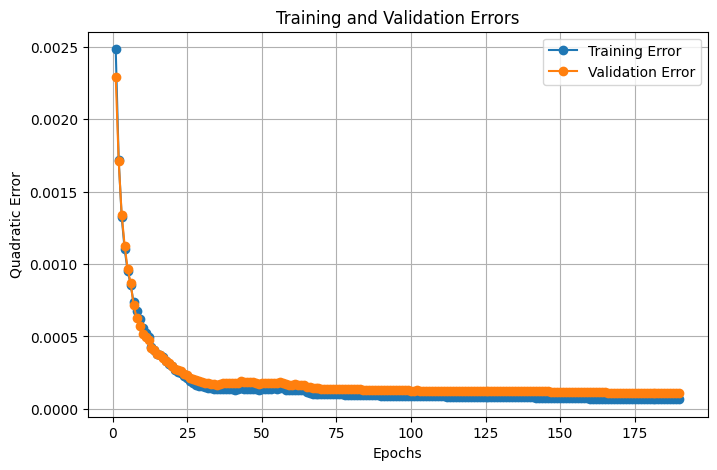

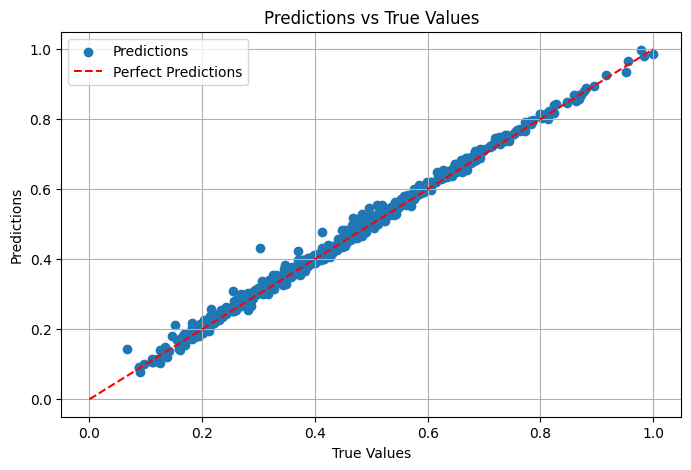

100%|██████████| 190/190 [00:41<00:00,  4.54it/s]

Configuration-> {'layers': [14, 128, 64, 32, 1], 'epochs': 190, 'learning_rate': 0.2, 'momentum': 0.15, 'activation': 'tanh'}
Mean Squared Error: 2.376288445054974e-05
Mean Absolute Error: 0.003301513967817096
Mean Absolute Percentage Error: 1.0539115335928086


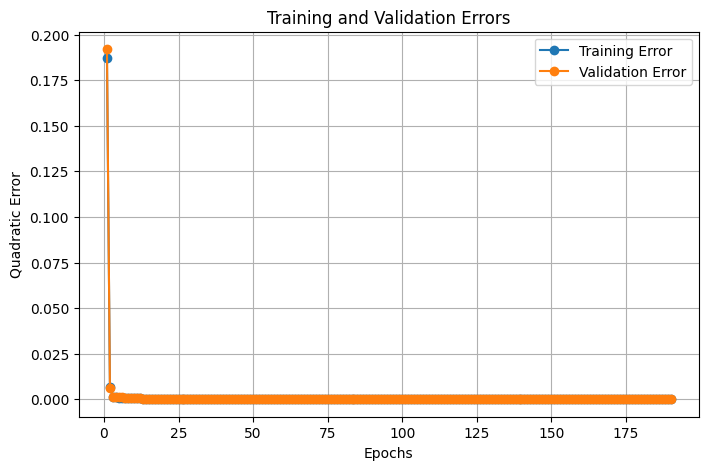

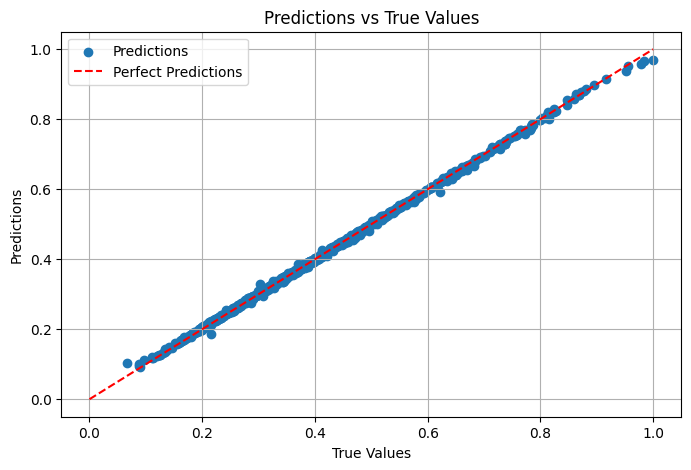

100%|██████████| 190/190 [00:27<00:00,  6.99it/s]


Configuration-> {'layers': [14, 64, 32, 1], 'epochs': 190, 'learning_rate': 0.15, 'momentum': 0.13, 'activation': 'tanh'}
Mean Squared Error: 3.8654055212620486e-05
Mean Absolute Error: 0.004265383611002178
Mean Absolute Percentage Error: 1.1003628675590524


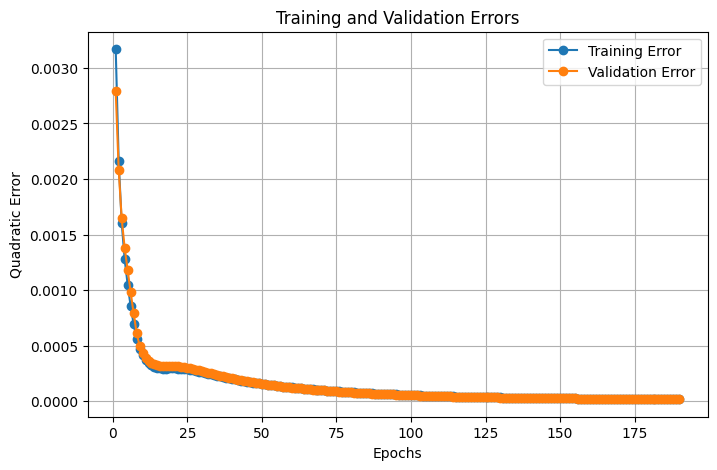

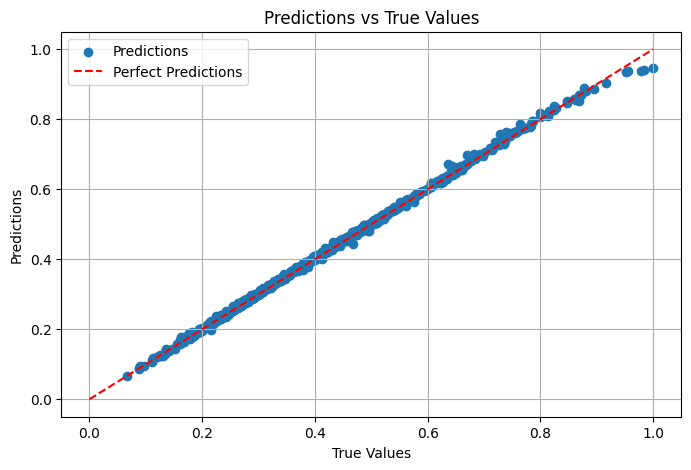

100%|██████████| 190/190 [00:34<00:00,  5.59it/s]

Configuration-> {'layers': [14, 64, 32, 1], 'epochs': 190, 'learning_rate': 0.32, 'momentum': 0.74, 'activation': 'sigmoid'}
Mean Squared Error: 5.0917373044824456e-05
Mean Absolute Error: 0.004122586227770148
Mean Absolute Percentage Error: 1.2413594908484695


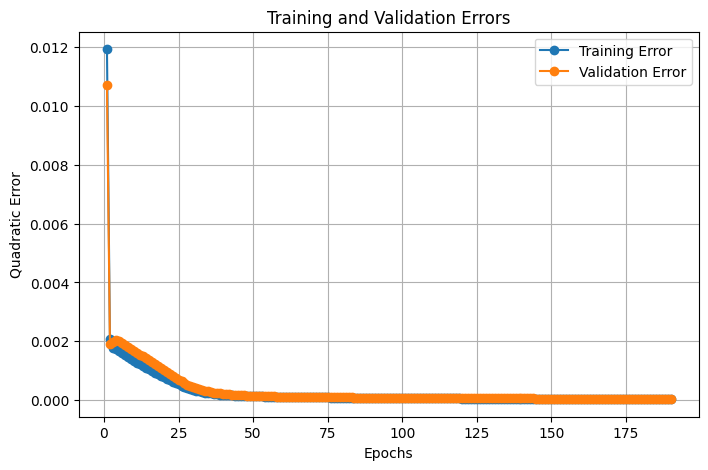

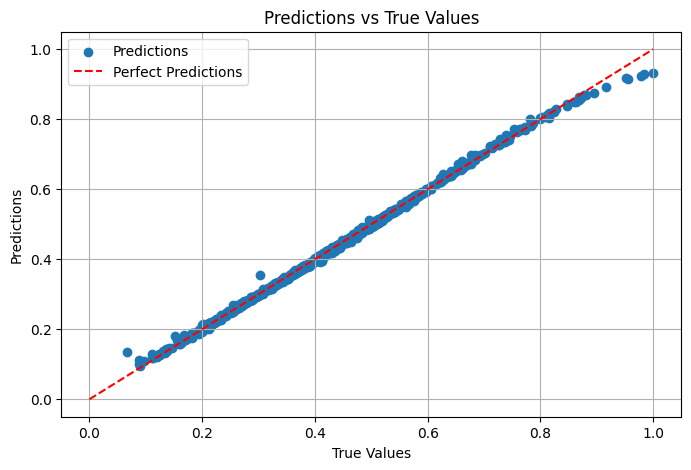

100%|██████████| 190/190 [00:24<00:00,  7.86it/s]

Configuration-> {'layers': [14, 18, 1], 'epochs': 190, 'learning_rate': 0.26, 'momentum': 0.84, 'activation': 'sigmoid'}
Mean Squared Error: 0.00010190292441238853
Mean Absolute Error: 0.0059560045791825665
Mean Absolute Percentage Error: 1.7788760626512845


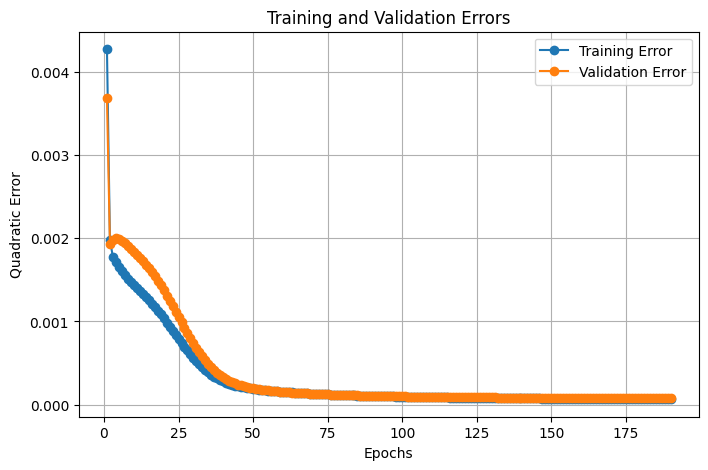

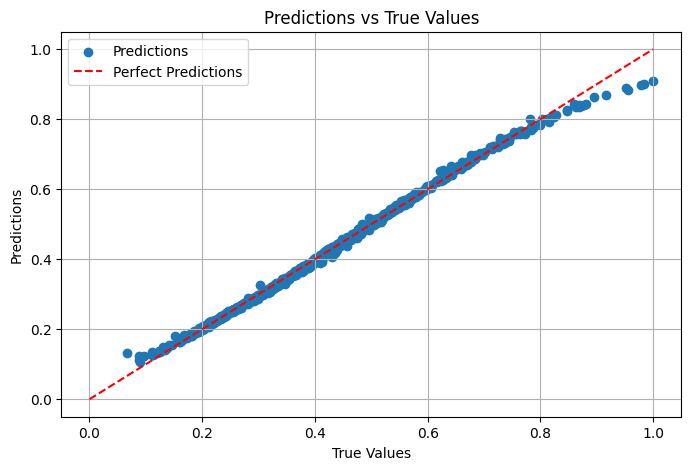

100%|██████████| 100/100 [00:06<00:00, 15.38it/s]

Configuration-> {'layers': [14, 18, 1], 'epochs': 100, 'learning_rate': 0.01, 'momentum': 0.84, 'activation': 'linear'}
Mean Squared Error: 0.0033103402075867
Mean Absolute Error: 0.041755532026563805
Mean Absolute Percentage Error: 12.347542607976319


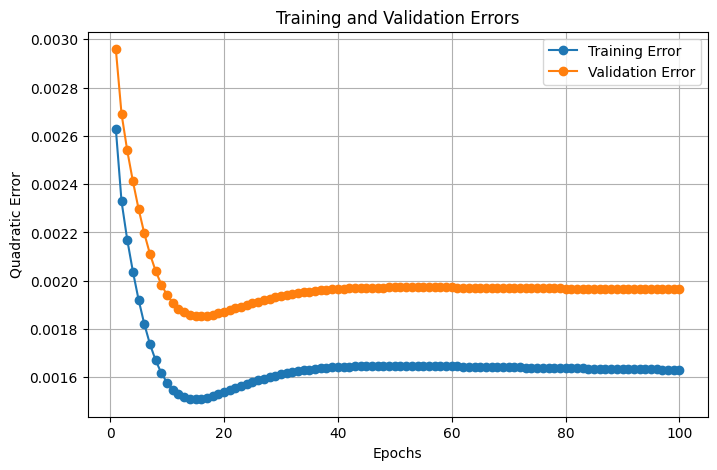

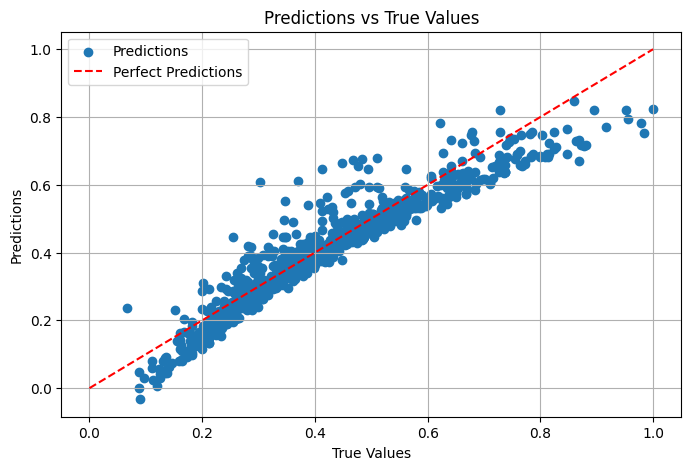

In [7]:
for configuration in hyperparameters:
    nn = NeuralNet(layers=configuration['layers'], epochs=configuration['epochs'],
                    learning_rate=configuration['learning_rate'], momentum=configuration['momentum'],
                    fact=configuration['activation'], val_split=0.2)

    nn.fit(X_train, y_train)

    train_loss, val_loss = nn.loss_epochs()

    predictions = nn.predict(X_test)

    mse = mean_squared_error(predictions, y_test)
    mae = mean_absolute_error(predictions, y_test)
    mape = mean_absolute_percentage_error(predictions, y_test)

    print("============================================================")
    print(f'Configuration-> {configuration}')
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Absolute Percentage Error: {mape}')
    print("============================================================")

    loss_errors(train_loss, val_loss)
    scatter_plot(predictions, y_test)
